# Tarea Semanal N8
Para el siguiente circuito:
<div>
<img src="img/enunciado.PNG" alt="Drawing" style="width: 400px;"/>
</div>

#### Análisis de cuadripolos

- Obtener la transferencia de tensión $\frac{V_o}{V_i}$ por método de cuadripolos (se sugiere referirse a alguno de los métodos de interconexión ya vistos). Ayuda: si $C_2\frac{4}{3}$ (se utilizó 1.333 para la simulación), los polos de la transferencia están ubicados sobre una circunferencia de radio unitario.
- Valide la transferencia con simulación circuital.

#### Análisis matricial

- Construya la matriz de admitancia indefinida (MAI) del circuito.
- Compute la transferencia de tensión con la MAI.

Se puede plantear al circuito como 2 cuadripolos tipo L conectados en cascada. Obtenemos sus matrices Z:

#### Cuadripolo 1

$$ Z_{11}=Z+\frac{1}{Y}=SL_1+\frac{1}{SC_2}=\frac{S^2L_1C_2+1}{SC_2} $$

$$ Z_{12}=\frac{1}{Y}=\frac{1}{SC_2} $$

$$ Z_{21}=\frac{1}{Y}=\frac{1}{SC_2} $$

$$ Z_{22}=\frac{1}{Y}=\frac{1}{SC_2} $$

#### Cuadripolo 2

$$ Z_{11}=Z+\frac{1}{Y}=SL_3+\frac{1}{G}=SL_3+R $$

$$ Z_{12}=\frac{1}{Y}=R $$

$$ Z_{21}=\frac{1}{Y}=R $$

$$ Z_{22}=\frac{1}{Y}=R $$

Convertimos las matrices Z a matrices T:

#### Cuadripolo 1

$$ A=\frac{Z_{11}}{Z_{21}}=\frac{S^2L_1C_2+1}{SC_2}SC_2=S^2L_1C_2+1 $$

$$ B=\frac{\Delta Z}{Z_{21}}=\frac{L_1}{C_2}SC_2=SL_1 $$

$$ C=\frac{1}{Z_{21}}=SC_2 $$

$$ D=\frac{Z_{22}}{Z_{21}}=1 $$

#### Cuadripolo 2

$$ A=\frac{Z_{11}}{Z_{21}}=(SL_3+R)\frac{1}{R}=\frac{SL_3}{R}+1 $$

$$ B=\frac{\Delta Z}{Z_{21}}=(SRL_3)\frac{1}{R}=SL_3 $$

$$ C=\frac{1}{Z_{21}}=\frac{1}{R} $$

$$ D=\frac{Z_{22}}{Z_{21}}=1 $$

Por asociación en cascada, planteamos el producto de las matrices y obtenemos como resultado la matriz del circuito completo, pero como nos interesa únicamente la relación $\frac{V_o}{V_i}$ nos podemos quedar con el resultado de $A_T$

$$ \frac{V_o}{V_i}=\frac{R}{S^3+S^2\frac{R}{L_3}+S(\frac{1}{L_1C_2}+\frac{1}{L_3C_2})+\frac{R}{L_1L_3C_2}} $$

A continuacion se realiza la simulación:

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

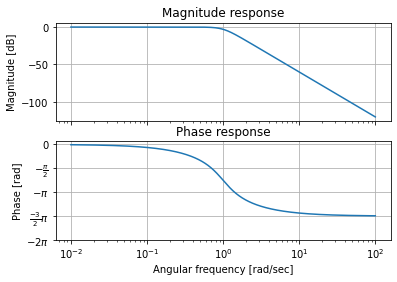

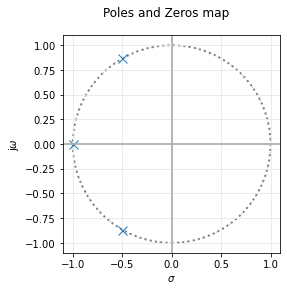

In [3]:
import splane as s
import scipy.signal as sig
import matplotlib.pyplot as plt
import numpy as np

R = 1
L_1 = 3/2
C_2 = 4/3
L_3 = 1/2

my_tf = sig.TransferFunction( [R], [1, (R/L_3), ((1/(L_1*C_2))+(1/(L_3*C_2))), (R/(L_1*L_3*C_2))] )

s.bodePlot(my_tf)
s.pzmap(my_tf)

Se realizó la simulación a través de LTSpice y se obtuvieron los siguientes resultados:

<div>
<img src="img/circuito-spice.PNG" alt="Drawing" style="width: 400px;"/>
</div>

<div>
<img src="img/spice.PNG" alt="Drawing" style="width: 1000px;"/>
</div>

A continuación realizaremos el estudio mediante la MAI:

<div>
<img src="img/circuito-spice-MAI.PNG" alt="Drawing" style="width: 400px;"/>
</div>

$$
\begin{pmatrix}
\frac{1}{SL_1} & 0 & -\frac{1}{SL_1} & 0 \\
0 & SC_2+\frac{1}{R} & -SC_2 & -\frac{1}{R} \\
-\frac{1}{SL_1} & -SC_2 & \frac{1}{SL_1}+\frac{1}{SL_3}+SC_2 & -\frac{1}{SL_3} \\
0 & -\frac{1}{R} & -\frac{1}{SL_3} & \frac{1}{SL_3}+\frac{1}{R} \\
\end{pmatrix}	
$$

Deseo obtener la transferencia de tensiones entre los nodos 0 y 3:

$$ A_{mn}^{ij}=\frac{V_{ij}}{V_{mn}}=signo(m-n).signo(i-j).\frac{\underline{Y_{ij}^{mn}}}{\underline{Y_{mn}^{mn}}} $$

$$ \frac{V_o}{V_i}=signo(0-1).signo(3-1).\frac{\underline{Y_{31}^{01}}}{\underline{Y_{01}^{01}}}=-\frac{\underline{Y_{31}^{01}}}{\underline{Y_{01}^{01}}} $$

$$ \frac{V_o}{V_i}=\frac{\frac{1}{S^2L_1L_3}}{(\frac{1}{SL_1}+\frac{1}{SL_3}+SC_2)(\frac{1}{SL_3}+\frac{1}{R})-\frac{1}{S^2L_3^2}} $$

Desarrollando algebraicamente se llega al siguiente resultado:

$$ \frac{V_o}{V_i}=\frac{R}{S^3+S^2\frac{R}{L_3}+S(\frac{1}{L_1C_2}+\frac{1}{L_3C_2})+\frac{R}{L_1L_3C_2}} $$

Coincide con la transferencia calculada por el método matricial.

# Ejercicio 2 - TP5

Se desea emular digitalmente la característica de un filtro analógico pasa bajos Butterworth de orden 2, con fc = 1kHz. 

- Para fs = 100kHz y aplicando transformación bilineal, obtener un filtro con respuesta  H(z) cuyo comportamiento emule al Butterworth analógico. Trazar la respuesta en frecuencia de módulo y fase de ambos filtros sobre un mismo gráfico para establecer comparaciones.
- Repetir el punto anterior para fs = 10kHz.
- Repetir los puntos A) y B) si se desea emular digitalmente la característica de un filtro analógico pasa altos Butterworth de orden 2, con fc = 6kHz 
- Indique en cuál de los 3 casos (A, B ó C) justificaría rediseñar aplicando prewarping. Explique el motivo en pocas palabras.


Filtro pasabajos Butterworth de orden 2:

$$ H(S)=\frac{1}{S^2+S\frac{1}{Q}+1} $$ 

siendo $w_o=1$; $Q=\frac{\sqrt{2}}{2}$; $k=1$

Aplicado la transformación bilineal:

$$ H(z)=H(S)\rfloor _{S=f(z)=k\frac{z-1}{z+1}} $$

siendo $k=2f_s$

$$ H(z)=\frac{1}{(k\frac{z-1}{z+1})^2+\frac{1}{Q}k\frac{z-1}{z+1}+1} $$

$$ H(z)=\frac{z^2+2z+1}{z^2(k^2+\frac{k}{Q}+1)+z(-2k^2+2)+(k^2-\frac{k}{Q}+1)} $$

$$ H(z)=\frac{b_oz^2+b_1z+b_2}{z^2+za_1+a_2}=\frac{b_o+b_1z^{-1}+b_2z^{-2}}{1+a_1z^{-1}+a_2z^{-2}} $$

siendo:

$$ a_1=\frac{-2k^2+2}{k^2+\frac{k}{Q}+1} $$

$$ a_2=\frac{k^2-\frac{k}{Q}+1}{k^2+\frac{k}{Q}+1} $$

$$ b_0=\frac{1}{k^2+\frac{k}{Q}+1} $$

$$ b_1=\frac{2}{k^2+\frac{k}{Q}+1} $$

$$ b_2=\frac{1}{k^2+\frac{k}{Q}+1} $$

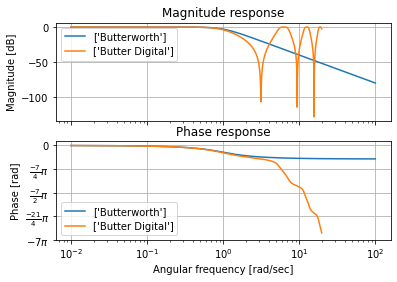

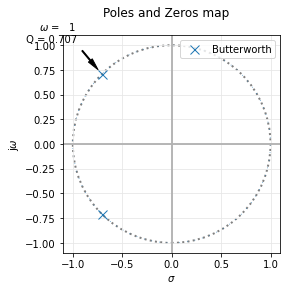

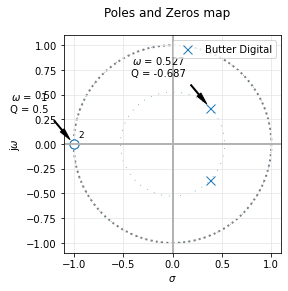

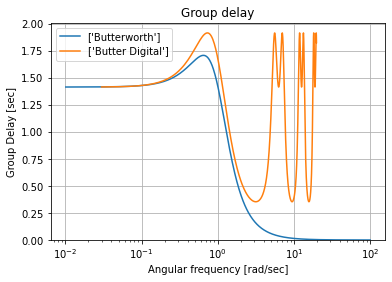

In [13]:
fs = 1 # Normalizado
k = 2*fs
Q = np.sqrt(2)/2

a_0 = 1
a_1 = (-2*k*k+2)/(k*k+(k/Q)+1)
a_2 = (k*k-(k/Q)+1)/(k*k+(k/Q)+1)
b_0 = (1)/(k*k+(k/Q)+1)
b_1 = (2)/(k*k+(k/Q)+1)
b_2 = (1)/(k*k+(k/Q)+1)

num = [1]
den = [1, 1/Q, 1]

my_analog_filter = sig.TransferFunction(num, den)

num_z = [b_0, b_1, b_2]
den_z = [a_0, a_1, a_2]

my_digital_filter = sig.TransferFunction(num_z, den_z, dt=1/fs)

s.analyze_sys([my_analog_filter, my_digital_filter], ["Butterworth", "Butter Digital"])

# Ejercicio 3 - TP5

Dadas las siguientes respuestas al impulso se pide:

- Transferencia del sistema H(z)
- Singularidades en el plano z
- Respuesta de módulo y fase

#### Filtro de media móvil 

- $ h_1(k)=(1,1) $ significa $ h(0)=1 $ y $ h(1)=1 $
- $ h_2(k)=(1,1,1) $

1- ¿Qué modificación debería implementarse para que la salida representa la media aritmética?

2- Para el último sistema, ¿qué frecuencia de muestreo se debería adoptar si se quisiera eliminar con dicho filtro la interferencia causada por la frecuencia de línea de 50 Hz?

#### Filtro diferenciador 

- $ h_1(k)=(1,-1) $ de primer orden 
- $ h_2(k)=(1,0,-1) $ de segundo orden

1- ¿Qué demora introducen ambos sistemas?

2- Hasta qué frecuencias estos sistemas se comportan como un derivador ideal. Considere una tolerancia admisible del 5% respecto a  su respuesta ideal $\lvert H(\Omega)\rvert = \Omega$



### Filtro de media móvil

##### Transferencia del primer sistema

$$ H(z)=1+z^{-1}=\frac{z+1}{z} $$

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

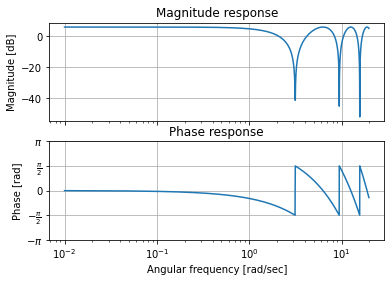

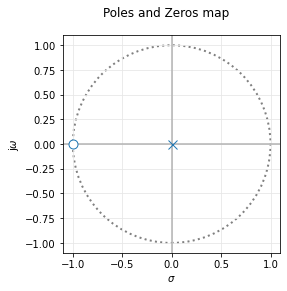

In [20]:
# Singularidades en el plano Z y respuesta de módulo y fase
fs=1

num_z = [1, 1]
den_z = [1, 0]

my_tf = sig.TransferFunction(num_z, den_z, dt=1/fs)

s.bodePlot(my_tf)
s.pzmap(my_tf)

Para que la salida represente la media aritmética, la salida debería dividirse por la cantidad de muestras promediadas, en este caso 2.

##### Transferencia del segundo sistema

$$ H(z)=1+z^{-1}+z^{-2}=\frac{z^2+z+1}{z^2} $$

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

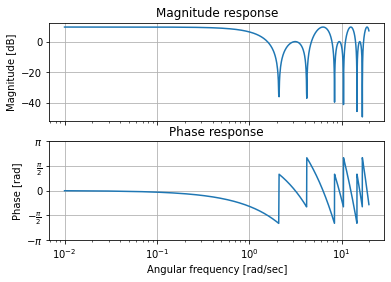

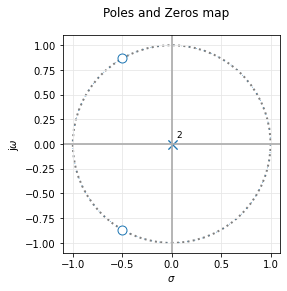

In [21]:
# Singularidades en el plano Z y respuesta de módulo y fase
fs=1

num_z = [1, 1, 1]
den_z = [1, 0, 0]

my_tf = sig.TransferFunction(num_z, den_z, dt=1/fs)

s.bodePlot(my_tf)
s.pzmap(my_tf)

Para que la salida represente la media aritmética, la salida debería dividirse por la cantidad de muestras promediadas, en este caso 3.

### Filtro diferenciador

##### Transferencia del primer sistema

$$ H(z)=1-z^{-1}=\frac{z-1}{z} $$

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

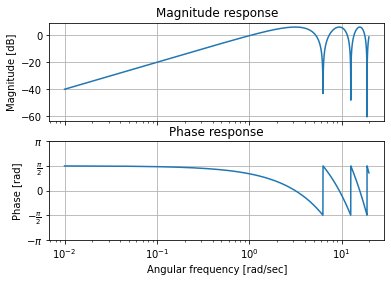

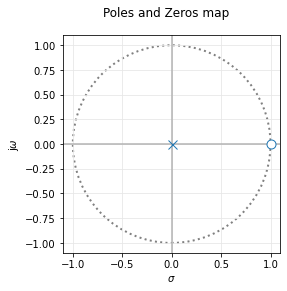

In [24]:
# Singularidades en el plano Z y respuesta de módulo y fase
fs=1

num_z = [1, -1]
den_z = [1, 0]

my_tf = sig.TransferFunction(num_z, den_z, dt=1/fs)

s.bodePlot(my_tf)
s.pzmap(my_tf)

##### Transferencia del segundo sistema

$$ H(z)=1-z^{-2}=\frac{z^2-1}{z^2} $$

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

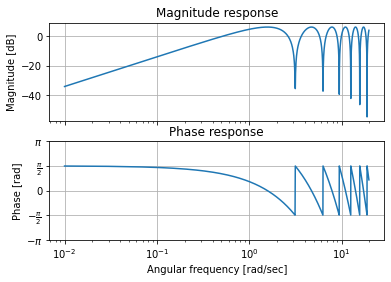

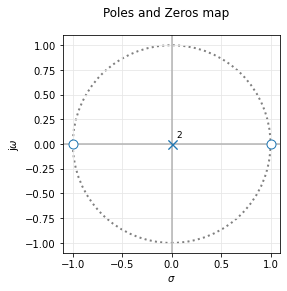

In [25]:
# Singularidades en el plano Z y respuesta de módulo y fase
fs=1

num_z = [1, 0, -1]
den_z = [1, 0, 0]

my_tf = sig.TransferFunction(num_z, den_z, dt=1/fs)

s.bodePlot(my_tf)
s.pzmap(my_tf)

El primer sistema introduce una demora igual al período de muestreo. El segundo sistema introduce una demora de 2 veces el período de muestreo.